In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load Dataset titanic:


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(f'{train.shape} 891 row and 12 columns for train the model')
print(f'{test.shape} 418 row and 11 columns for train the model')
'survived columns it is not avalibale in test we must predict it'

(891, 12) 891 row and 12 columns for train the model
(418, 11) 418 row and 11 columns for train the model


'survived columns it is not avalibale in test we must predict it'

## Cleaning Datasets:

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### drop Passengerid & Ticket from both datasets it's not usefull for us :

In [7]:
train.drop(columns=['PassengerId', 'Ticket'], inplace=True)
test.drop(columns=['PassengerId', 'Ticket'], inplace=True)


In [8]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


## Name columns it's Not usefull but we want to seprate MR and MISS and other for this task do below:

In [9]:
def sep_name(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0]
    else:
        return np.nan

In [10]:
train['nick_name'] = train['Name'].apply(sep_name)
test['nick_name'] = train['Name'].apply(sep_name)

In [11]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,nick_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,Mr


In [12]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,nick_name
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,Miss
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,Mrs
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,Mr
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S,Mrs
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S,Mrs


## now we dont need Name column so drop it from both datasets:

In [13]:
train.drop(columns=['Name'], inplace=True, axis='columns')

In [14]:
test.drop(columns=['Name'], inplace=True, axis='columns')

In [15]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,nick_name
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,Rev
887,1,1,female,19.0,0,0,30.0000,B42,S,Miss
888,0,3,female,NaN,1,2,23.4500,NaN,S,Miss
889,1,1,male,26.0,0,0,30.0000,C148,C,Mr


In [16]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,nick_name
0,3,male,34.5,0,0,7.8292,NaN,Q,Mr
1,3,female,47.0,1,0,7.0000,NaN,S,Mrs
2,2,male,62.0,0,0,9.6875,NaN,Q,Miss
3,3,male,27.0,0,0,8.6625,NaN,S,Mrs
4,3,female,22.0,1,1,12.2875,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S,Mr
414,1,female,39.0,0,0,108.9000,C105,C,Mr
415,3,male,38.5,0,0,7.2500,NaN,S,Mrs
416,3,male,NaN,0,0,8.0500,NaN,S,Mrs


## As you see cabin columns has lots of NAN value and not valuable columns:

In [17]:
train.drop(columns='Cabin', inplace=True, axis='columns')
test.drop(columns='Cabin', inplace=True, axis='columns')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   889 non-null    object 
 8   nick_name  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    object 
 2   Age        332 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       417 non-null    float64
 6   Embarked   418 non-null    object 
 7   nick_name  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [20]:
embark_train = pd.get_dummies(train['Embarked'])
train = train.join(embark_train)
train.drop(columns='Embarked', inplace=True, axis='columns')

In [21]:
embark_test = pd.get_dummies(test['Embarked'])
test = test.join(embark_test)
test.drop(columns='Embarked', inplace=True)

In [22]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,nick_name,C,Q,S
0,0,3,male,22.0,1,0,7.2500,Mr,0,0,1
1,1,1,female,38.0,1,0,71.2833,Mrs,1,0,0
2,1,3,female,26.0,0,0,7.9250,Miss,0,0,1
3,1,1,female,35.0,1,0,53.1000,Mrs,0,0,1
4,0,3,male,35.0,0,0,8.0500,Mr,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Rev,0,0,1
887,1,1,female,19.0,0,0,30.0000,Miss,0,0,1
888,0,3,female,NaN,1,2,23.4500,Miss,0,0,1
889,1,1,male,26.0,0,0,30.0000,Mr,1,0,0


In [23]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,nick_name,C,Q,S
0,3,male,34.5,0,0,7.8292,Mr,0,1,0
1,3,female,47.0,1,0,7.0000,Mrs,0,0,1
2,2,male,62.0,0,0,9.6875,Miss,0,1,0
3,3,male,27.0,0,0,8.6625,Mrs,0,0,1
4,3,female,22.0,1,1,12.2875,Mr,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,Mr,0,0,1
414,1,female,39.0,0,0,108.9000,Mr,1,0,0
415,3,male,38.5,0,0,7.2500,Mrs,0,0,1
416,3,male,NaN,0,0,8.0500,Mrs,0,0,1


In [24]:
sex_train = pd.get_dummies(train['Sex'])
train = train.join(sex_train)
train.drop(columns=['Sex'], inplace=True)

In [25]:
sex_test = pd.get_dummies(test['Sex'])
test = test.join(sex_test)
test.drop(columns=['Sex'], inplace=True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        714 non-null    float64
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Fare       891 non-null    float64
 6   nick_name  891 non-null    object 
 7   C          891 non-null    uint8  
 8   Q          891 non-null    uint8  
 9   S          891 non-null    uint8  
 10  female     891 non-null    uint8  
 11  male       891 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(5)
memory usage: 53.2+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Age        332 non-null    float64
 2   SibSp      418 non-null    int64  
 3   Parch      418 non-null    int64  
 4   Fare       417 non-null    float64
 5   nick_name  418 non-null    object 
 6   C          418 non-null    uint8  
 7   Q          418 non-null    uint8  
 8   S          418 non-null    uint8  
 9   female     418 non-null    uint8  
 10  male       418 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(5)
memory usage: 21.8+ KB


In [28]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [29]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)


## datasets are cleans now but some columns like S and Male must remove it 

In [30]:
train.drop(columns=['S', 'male'], inplace=True)
test.drop(columns=['S', 'male'], inplace=True)

In [31]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,nick_name,C,Q,female
0,0,3,22.0,1,0,7.2500,Mr,0,0,0
1,1,1,38.0,1,0,71.2833,Mrs,1,0,1
2,1,3,26.0,0,0,7.9250,Miss,0,0,1
3,1,1,35.0,1,0,53.1000,Mrs,0,0,1
4,0,3,35.0,0,0,8.0500,Mr,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Rev,0,0,0
887,1,1,19.0,0,0,30.0000,Miss,0,0,1
888,0,3,28.0,1,2,23.4500,Miss,0,0,1
889,1,1,26.0,0,0,30.0000,Mr,1,0,0


In [32]:
train['nick_name'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Don               1
 Ms                1
 Sir               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Mme               1
 Lady              1
Name: nick_name, dtype: int64

In [33]:
def return_num_nickname(nick_name):
    if 'Mr' in nick_name:
        return 0
    elif 'Miss' in nick_name:
        return 1
    elif 'Mrs' in nick_name:
        return 2
    else:
        return 3

In [34]:
train['nick_name'] = train['nick_name'].apply(return_num_nickname)

In [35]:
test['nick_name'] = test['nick_name'].apply(return_num_nickname)

In [36]:
train.rename(columns={'female':'Gender'}, inplace=True)

In [37]:
test.rename(columns={'female':'Gender'}, inplace=True)

## Visualize Titanic:

In [38]:
group_gender_pclass = train.groupby('Gender')['Pclass'].size()

In [39]:
group_gender_pclass

Gender
0    577
1    314
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Gender'>

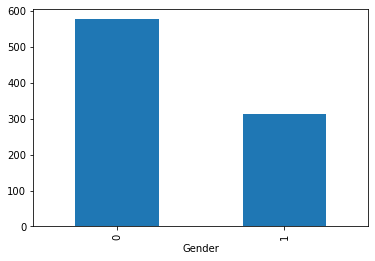

In [40]:
group_gender_pclass.plot(kind='bar')

In [41]:
group_placc_Gender = train.groupby('Pclass')['Gender'].size()

In [42]:
group_placc_Gender

Pclass
1    216
2    184
3    491
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Pclass'>

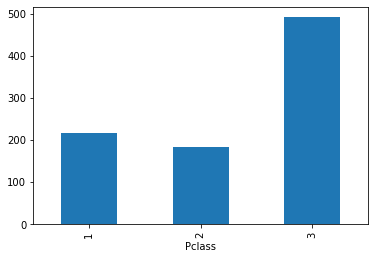

In [43]:
group_placc_Gender.plot(kind='bar')

In [44]:
gender_pclass_survived = train.pivot_table(index='Gender', columns='Pclass', values='Survived',aggfunc='size')
gender_pclass_survived

Pclass,1,2,3
Gender,,,
0,122,108,347
1,94,76,144


<AxesSubplot:xlabel='Gender', ylabel='Number Of Survived'>

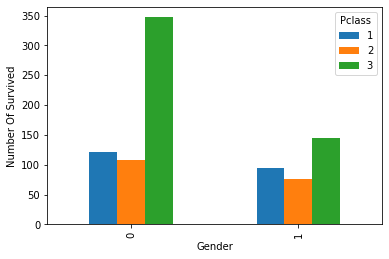

In [45]:
gender_pclass_survived.plot(kind='bar', ylabel='Number Of Survived')

### look at the fare columns in both datasets you see the payment it's between 0 to 512,00 and when we want to creat model it looks like outliear so we do minmaxsclare on it 
### Preproccesing For Train:

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
fare_train = train['Fare'].values
train.drop('Fare', inplace=True, axis='columns')

In [48]:
normalize_fare = MinMaxScaler()

In [49]:
fare_train_normalize = normalize_fare.fit_transform(fare_train.reshape(-1,1))

In [50]:
fare_column_train = pd.DataFrame(fare_train_normalize)

In [51]:
fare_column_train.rename(columns={0:'fare'}, inplace=True)

In [65]:
train = pd.concat([train, fare_column_train], axis=1)

## Preproccesing For Test:

In [53]:
fare_test = test['Fare'].values

In [54]:
fare_test_normalize = normalize_fare.fit_transform(fare_test.reshape(-1,1))

In [55]:
fare_column_test = pd.DataFrame(fare_test_normalize)

In [56]:
fare_column_test.rename(columns={0:'Fare'}, inplace=True)

In [57]:
test.drop('Fare', inplace=True, axis='columns')

In [58]:
test = test.join(fare_column_test)

In [59]:
test

,Pclass,Age,SibSp,Parch,nick_name,C,Q,Gender,Fare
0,3,34.5,0,0,0,0,1,0,0.015282
1,3,47.0,1,0,0,0,0,1,0.013663
2,2,62.0,0,0,1,0,1,0,0.018909
3,3,27.0,0,0,0,0,0,0,0.016908
4,3,22.0,1,1,0,0,0,1,0.023984
...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,0,0,0,0,0.015713
414,1,39.0,0,0,0,1,0,1,0.212559
415,3,38.5,0,0,0,0,0,0,0.014151
416,3,27.0,0,0,0,0,0,0,0.015713


In [69]:
train

,Survived,Pclass,Age,SibSp,Parch,nick_name,C,Q,Gender,fare
0,0,3,22.0,1,0,0,0,0,0,0.014151
1,1,1,38.0,1,0,0,1,0,1,0.139136
2,1,3,26.0,0,0,1,0,0,1,0.015469
3,1,1,35.0,1,0,0,0,0,1,0.103644
4,0,3,35.0,0,0,0,0,0,0,0.015713
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,3,0,0,0,0.025374
887,1,1,19.0,0,0,1,0,0,1,0.058556
888,0,3,28.0,1,2,1,0,0,1,0.045771
889,1,1,26.0,0,0,0,1,0,0,0.058556


## Make Model:
### Support Vector Machine

In [71]:
x_train = train.drop('Survived', axis='columns')

In [73]:
y_train = train['Survived']

In [74]:
x_train.shape

(891, 9)

In [76]:
y_train.shape

(891,)

In [77]:
x_test = test

In [78]:
x_test.shape

(418, 9)

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

rbf_kernel = SVC(kernel='rbf', gamma='auto', probability=True)


In [146]:
rbf_kernel.fit(x_train, y_train)

SVC(gamma='auto', probability=True)

In [147]:
y_predict = rbf_kernel.predict(x_test)

In [148]:
rbf_kernel.score(x_train, y_train)

0.8518518518518519

In [149]:
pd.Series(y_predict).value_counts()

0    270
1    148
dtype: int64

### Model RandomClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [142]:
random_classi = RandomForestClassifier(n_estimators=200)

In [143]:
voting_classi = VotingClassifier(
    estimators=[('random_classi',random_classi),
               ('svm', rbf_kernel)], voting='soft')

In [144]:
voting_classi.fit(x_train, y_train)

VotingClassifier(estimators=[('random_classi',
                              RandomForestClassifier(n_estimators=200)),
                             ('svm', SVC(gamma='auto', probability=True))],
                 voting='soft')

In [145]:
for clf in (random_classi, rbf_kernel, voting_classi):
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(label_test, y_predict))
    

RandomForestClassifier 0.8492822966507177
SVC 0.8803827751196173
VotingClassifier 0.9138755980861244


### tip If you want to find best parameter use Gridsearch 

In [206]:
y_voting_predict = voting_classi.predict(x_test)

In [212]:
y_voting_predict = pd.DataFrame(y_voting_predict)

In [216]:
passeger_id = pd.read_csv('gender_submission.csv')

passeger_id = passeger_id['PassengerId']

passeger_id = pd.DataFrame(passeger_id)
print(type(passeger_id))

<class 'pandas.core.frame.DataFrame'>


In [217]:
result = passeger_id.join(y_voting_predict)

In [220]:
result.rename(columns={0:'Survived'}, inplace=True)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [221]:
result.to_csv('result.csv')